In [1]:
import sys
sys.path.insert(0, '../')

# Test `cluster`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from cluster.cluster import KMeansClustering, SpectralClustering, visualize_clusters_2d, visualize_graph_clusters_2d
from cluster.stats import MultivariateNormal, MixtureNormal, visualize_mixture_2d
from cluster.graph import visualize_graph_2d

## Mixture Distribution Visualization (2D)

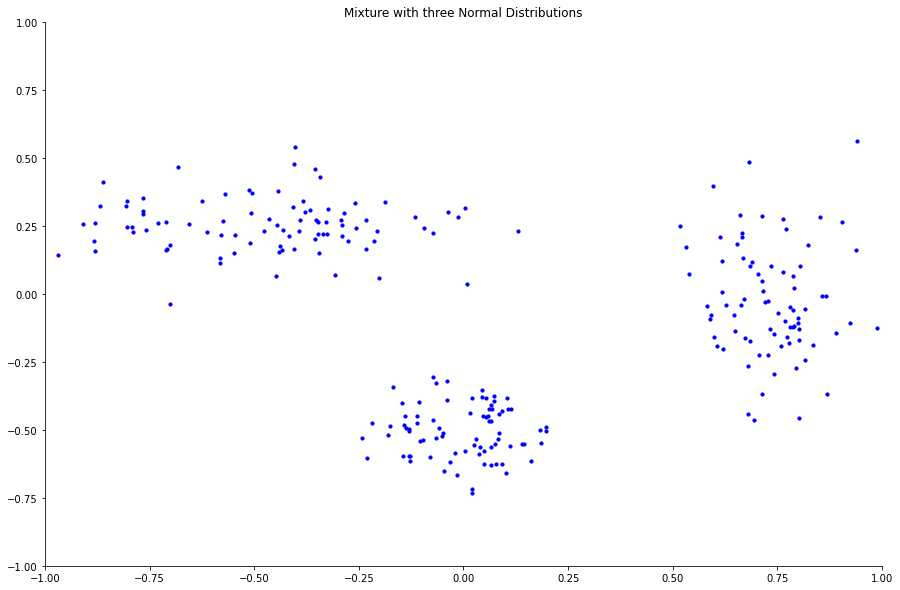

In [4]:
n = 250

mu_1 = np.array([0, -0.5])
mu_2 = np.array([-0.5, 0.25])
mu_3 = np.array([0.75, 0.])

sigma_1 = np.diag(np.array([0.01, 0.01]))
sigma_2 = np.diag(np.array([0.05, 0.01]))
sigma_3 = np.diag(np.array([0.01, 0.05]))

mix = MixtureNormal(multivariates=[MultivariateNormal(mean=mu_1, covariance=sigma_1), 
                                   MultivariateNormal(mean=mu_2, covariance=sigma_2),
                                   MultivariateNormal(mean=mu_3, covariance=sigma_3),], 
                    weights=[1/3] * 3)

fig, ax = plt.subplots(figsize=(15, 10))
ax, points = visualize_mixture_2d(mix, n, ax, 'Mixture with three Normal Distributions')
plt.show()

## $k$-Means on Mixture Distribution

clusters have converged in 4 iterations


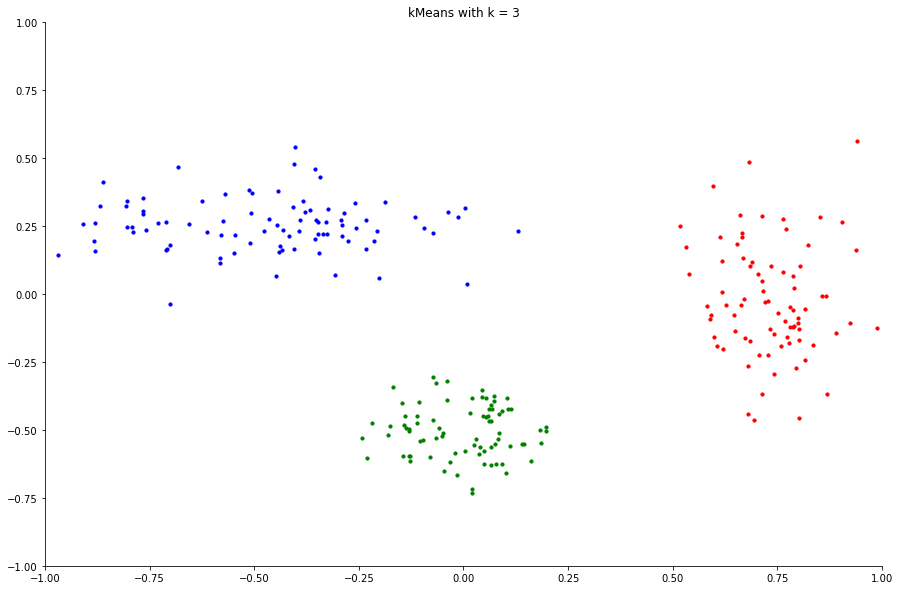

In [5]:
k = 3
kmeans_clustering = KMeansClustering(k=k, max_iter=1000, seed=0, eps=1e-10, norm=None)
kmeans_clustering.cluster(points)

fig, ax = plt.subplots(figsize=(15, 10))
ax = visualize_clusters_2d(points, kmeans_clustering.get_labels(), ax, f'kMeans with k = {k}')
plt.show()

## Comparison $k$-Means and Spectral Clustering

In [6]:
from sklearn.datasets import make_circles

In [7]:
circles = make_circles(n_samples=500, shuffle=True, noise=0.03, random_state=None, factor=0.5)[0]
circles = circles * 2/3

clusters have converged in 3 iterations
clusters have converged in 4 iterations


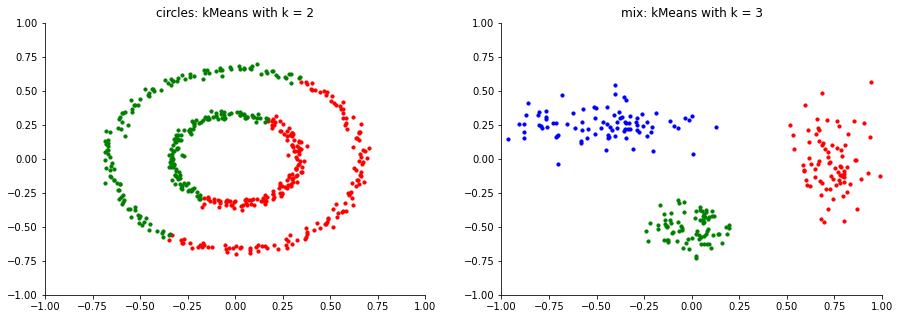

In [8]:
k_1 = 2
kmeans_clustering_circles = KMeansClustering(k=k_1, max_iter=1000, seed=0, eps=1e-10, norm=None)
kmeans_clustering_circles.cluster(circles)

k_2 = 3
kmeans_clustering_mix = KMeansClustering(k=k_2, max_iter=1000, seed=0, eps=1e-10, norm=None)
kmeans_clustering_mix.cluster(points)


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0] = visualize_clusters_2d(circles, kmeans_clustering_circles.get_labels(), ax[0], 
                              f'circles: kMeans with k = {k_1}')
ax[1] = visualize_clusters_2d(points, kmeans_clustering_mix.get_labels(), ax[1], 
                              f'mix: kMeans with k = {k_2}')
plt.show()

In [9]:
fig.savefig('kMeans_clustering.png')

working on graph type eps with param 0.01


../cluster/linalg/power.py:30: UserWarning: reached maximum number of iterations with 100000
  warnings.warn(f'reached maximum number of iterations with {max_iter}')


clusters have converged in 4 iterations
working on graph type eps with param 0.05
clusters have converged in 9 iterations
working on graph type eps with param 0.1
clusters have converged in 3 iterations
working on graph type kNN with param 1
clusters have converged in 7 iterations
working on graph type kNN with param 5
clusters have converged in 3 iterations
working on graph type kNN with param 7
clusters have converged in 3 iterations
working on graph type mkNN with param 1
clusters have converged in 12 iterations
working on graph type mkNN with param 5
clusters have converged in 3 iterations
working on graph type mkNN with param 7
clusters have converged in 3 iterations


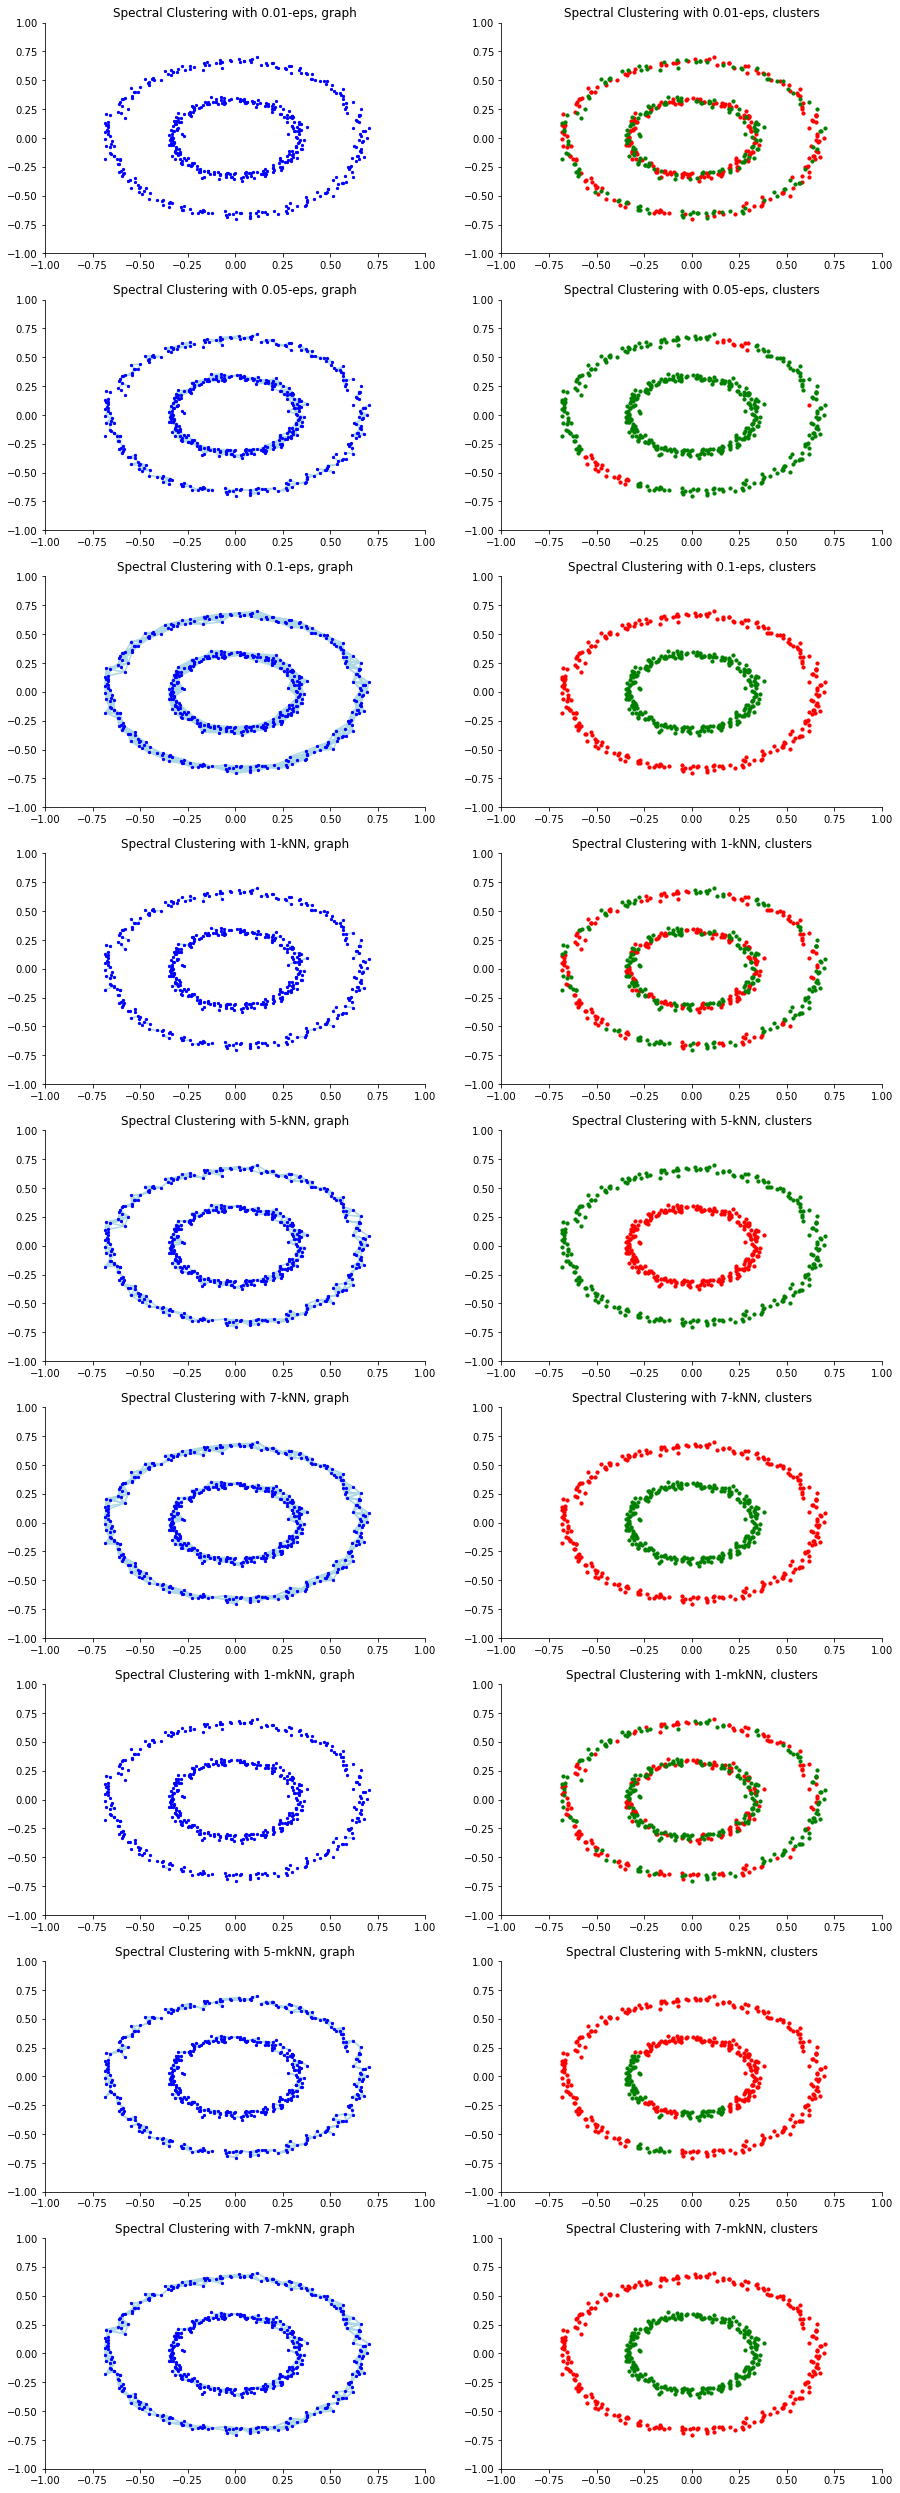

In [10]:
data = circles

graph_types = ['eps', 'kNN', 'mkNN']

eps_graph_params = [0.01, 0.05, 0.1]
kNN_graph_params = [1, 5, 7]
mkNN_graph_params = [1, 5, 7]

graph_params = [eps_graph_params, kNN_graph_params, mkNN_graph_params]

number_lines_plot = len(graph_types) * len(graph_params)
fig1, ax = plt.subplots(number_lines_plot, 2, figsize=(15, 5 * number_lines_plot))

for i in range(len(graph_types)):
    graph_type = graph_types[i]
    params = graph_params[i]
    
    for j in range(len(params)):
        param = params[j]
        print(f'working on graph type {graph_type} with param {param}')
        
        k = 2
        spectral_clustering = SpectralClustering(
            k, max_iter=1000, seed=0, eps=1e-10, norm=None, device='cpu', sparse=True, 
            graph=graph_type, 
            graph_param=param)
        spectral_clustering.cluster(data)

        titles = [f'Spectral Clustering with {param}-{graph_type}, graph',
                  f'Spectral Clustering with {param}-{graph_type}, clusters']
        ax[i * len(graph_types) + j, :] = visualize_graph_clusters_2d(data, spectral_clustering, 
                                         ax[i * len(graph_types) + j, :], titles=titles, annotate=False)

plt.show()

In [11]:
fig1.savefig('circles_spectral_clustering.png')

working on graph type eps with param 0.01
clusters have converged in 9 iterations
working on graph type eps with param 0.05
clusters have converged in 6 iterations
working on graph type eps with param 0.1
clusters have converged in 2 iterations
working on graph type kNN with param 1
clusters have converged in 6 iterations
working on graph type kNN with param 5
clusters have converged in 1 iterations
working on graph type kNN with param 7
clusters have converged in 1 iterations
working on graph type mkNN with param 1
clusters have converged in 11 iterations
working on graph type mkNN with param 5
clusters have converged in 4 iterations
working on graph type mkNN with param 7
clusters have converged in 3 iterations


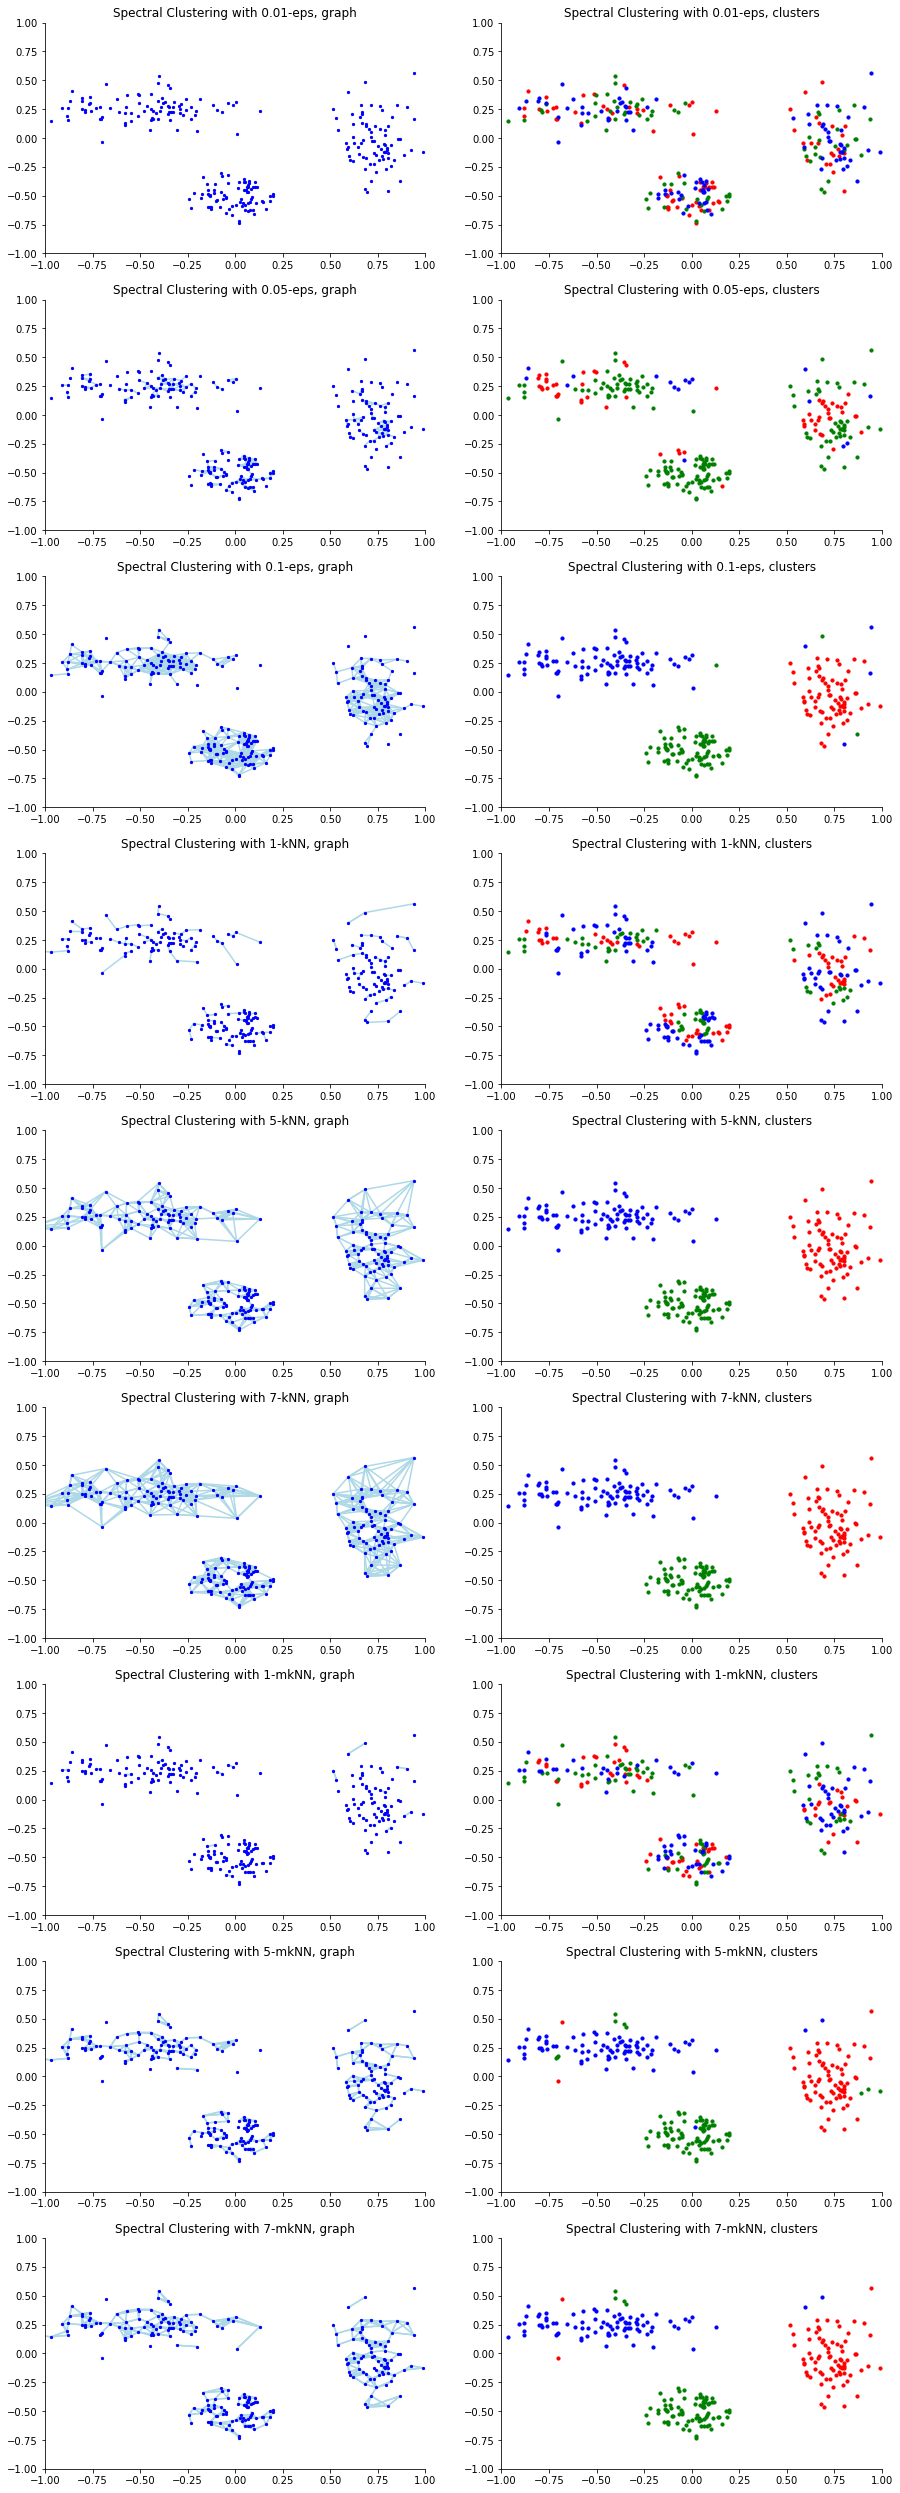

In [12]:
data = points

graph_types = ['eps', 'kNN', 'mkNN']

eps_graph_params = [0.01, 0.05, 0.1]
kNN_graph_params = [1, 5, 7]
mkNN_graph_params = [1, 5, 7]

graph_params = [eps_graph_params, kNN_graph_params, mkNN_graph_params]

number_lines_plot = len(graph_types) * len(graph_params)
fig2, ax = plt.subplots(number_lines_plot, 2, figsize=(15, 5 * number_lines_plot))

for i in range(len(graph_types)):
    graph_type = graph_types[i]
    params = graph_params[i]
    
    for j in range(len(params)):
        param = params[j]
        print(f'working on graph type {graph_type} with param {param}')
        
        k = 3
        spectral_clustering = SpectralClustering(
            k, max_iter=1000, seed=0, eps=1e-10, norm=None, device='cpu', sparse=True, 
            graph=graph_type, 
            graph_param=param)
        spectral_clustering.cluster(data)

        titles = [f'Spectral Clustering with {param}-{graph_type}, graph',
                  f'Spectral Clustering with {param}-{graph_type}, clusters']
        
        ax[i * len(graph_types) + j, :] = visualize_graph_clusters_2d(data, spectral_clustering, 
                                         ax[i * len(graph_types) + j, :], titles=titles, annotate=False)

plt.show()

In [13]:
fig2.savefig('mixture_spectral_clustering.png')